In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

import matplotlib
%matplotlib inline
color = '#ff661f'
cmap1 = 'Oranges'
cmap2 =  'Set3'
palette1 = 'Oranges'
palette2 = 'Set3'


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/home/enes/Desktop/GDZ_datathon/gdz_merge_data.csv")
df_test = pd.read_csv("/home/enes/Desktop/GDZ_datathon/data/test.csv")

df['tarih'] = pd.to_datetime(df['tarih'])
df_test['tarih'] = pd.to_datetime(df_test['tarih'])

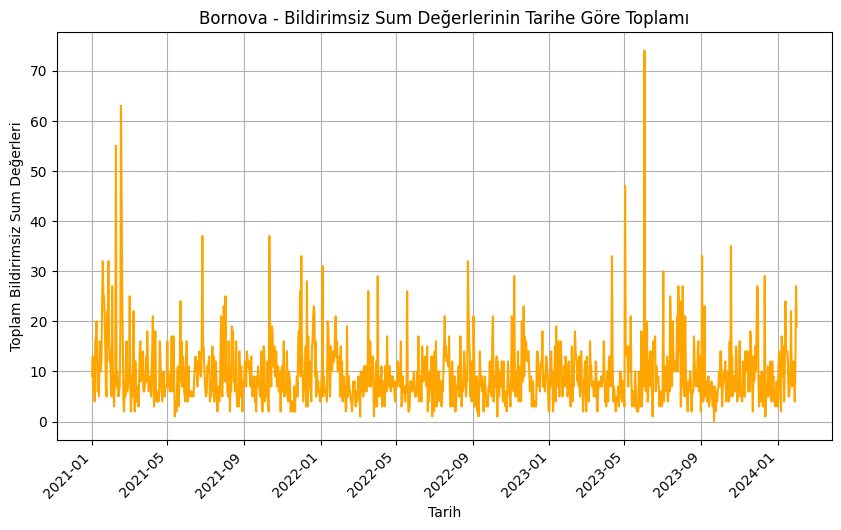

In [3]:
bornova_df = df[df['ilcee'] == 'bornova']

bornova_df['tarih'] = pd.to_datetime(bornova_df['tarih'])

bornova_bildirimsiz_sum_by_date = bornova_df.groupby('tarih')['bildirimsiz_sum'].sum()

plt.figure(figsize=(10, 6))
bornova_bildirimsiz_sum_by_date.plot(kind='line', color='orange')
plt.title('Bornova - Bildirimsiz Sum Değerlerinin Tarihe Göre Toplamı')
plt.xlabel('Tarih')
plt.ylabel('Toplam Bildirimsiz Sum Değerleri')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

In [4]:
bildirimsiz_sum_february_2023_total = df[(pd.to_datetime(df['tarih']).dt.year == 2023) & 
                                         (pd.to_datetime(df['tarih']).dt.month == 2)]['bildirimsiz_sum'].sum()
bildirimsiz_sum_february_2023_total

5200

In [5]:
bornova_bildirimsiz_sum_february_2021_total = df[(df['ilcee'] == 'cesme') & 
                                                  (pd.to_datetime(df['tarih']).dt.month == 2) & 
                                                  (pd.to_datetime(df['tarih']).dt.year == 2023)]['bildirimsiz_sum'].sum()
bornova_bildirimsiz_sum_february_2021_total

260

In [6]:
bornova_bildirimsiz_sum_february_2021_total

260

In [7]:
bornova_bildirimsiz_sum_february_total = df[(df['ilcee'] == 'bornova') & (pd.to_datetime(df['tarih']).dt.month == 2)]['bildirimsiz_sum'].sum()
bornova_bildirimsiz_sum_february_total

847

In [8]:
df.head()

,Yıl,Ay,Gün,lat,lon,t_2m_C,effective_cloud_cover_p,global_rad_W,relative_humidity_2m_p,wind_dir_10m_d,...,Bayram_Flag,tarih,bildirimsiz_sum,bildirimli_sum,gun_adi,il,ilcee,gun_tipi,sicaklik_fark,ruzgar_yonu
0,2021,1,1,38.7996,26.9707,13.275000,55.045833,73.020833,85.991667,167.204167,...,New Year's Day,2021-01-01,5,0,Friday,izmir,aliaga,Haftaiçi,-0.654167,Güneydoğu
1,2021,1,2,38.7996,26.9707,12.870833,36.125000,92.858333,82.137500,106.650000,...,NaN,2021-01-02,13,0,Saturday,izmir,aliaga,Haftasonu,-0.775000,Doğu
2,2021,1,3,38.7996,26.9707,12.633333,64.870833,39.266667,79.120833,122.520833,...,NaN,2021-01-03,4,0,Sunday,izmir,aliaga,Haftasonu,-0.212500,Doğu
3,2021,1,4,38.7996,26.9707,13.733333,47.783333,78.945833,70.312500,123.408333,...,NaN,2021-01-04,9,0,Monday,izmir,aliaga,Haftaiçi,-0.041667,Doğu
4,2021,1,5,38.7996,26.9707,14.375000,30.379167,95.716667,75.220833,195.720833,...,NaN,2021-01-05,2,0,Tuesday,izmir,aliaga,Haftaiçi,-0.525000,Güney


In [9]:
df_test

,tarih,ilce,bildirimli_sum
0,2024-02-01,izmir-aliaga,0
1,2024-02-01,izmir-bayindir,1
2,2024-02-01,izmir-bayrakli,0
3,2024-02-01,izmir-bergama,1
4,2024-02-01,izmir-bornova,1
...,...,...,...
1358,2024-02-29,izmir-beydag,0
1359,2024-02-29,izmir-narlidere,0
1360,2024-02-29,izmir-selcuk,0
1361,2024-02-29,manisa-kula,0


In [10]:
monthly_counts = df_test.groupby(df_test['tarih'].dt.to_period('M')).size()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(monthly_counts)

tarih
2024-02    1363
Freq: M, dtype: int64


In [11]:
monthly_counts = df.groupby(df['tarih'].dt.to_period('M')).size()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#print(monthly_counts)


In [12]:
df.shape

(48148, 23)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48148 entries, 0 to 48147
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Yıl                      48148 non-null  int64         
 1   Ay                       48148 non-null  int64         
 2   Gün                      48148 non-null  int64         
 3   lat                      48148 non-null  float64       
 4   lon                      48148 non-null  float64       
 5   t_2m_C                   48148 non-null  float64       
 6   effective_cloud_cover_p  48148 non-null  float64       
 7   global_rad_W             48148 non-null  float64       
 8   relative_humidity_2m_p   48148 non-null  float64       
 9   wind_dir_10m_d           48148 non-null  float64       
 10  wind_speed_10m_ms        48148 non-null  float64       
 11  prob_precip_1h_p         48148 non-null  float64       
 12  t_apparent_C             48148 n

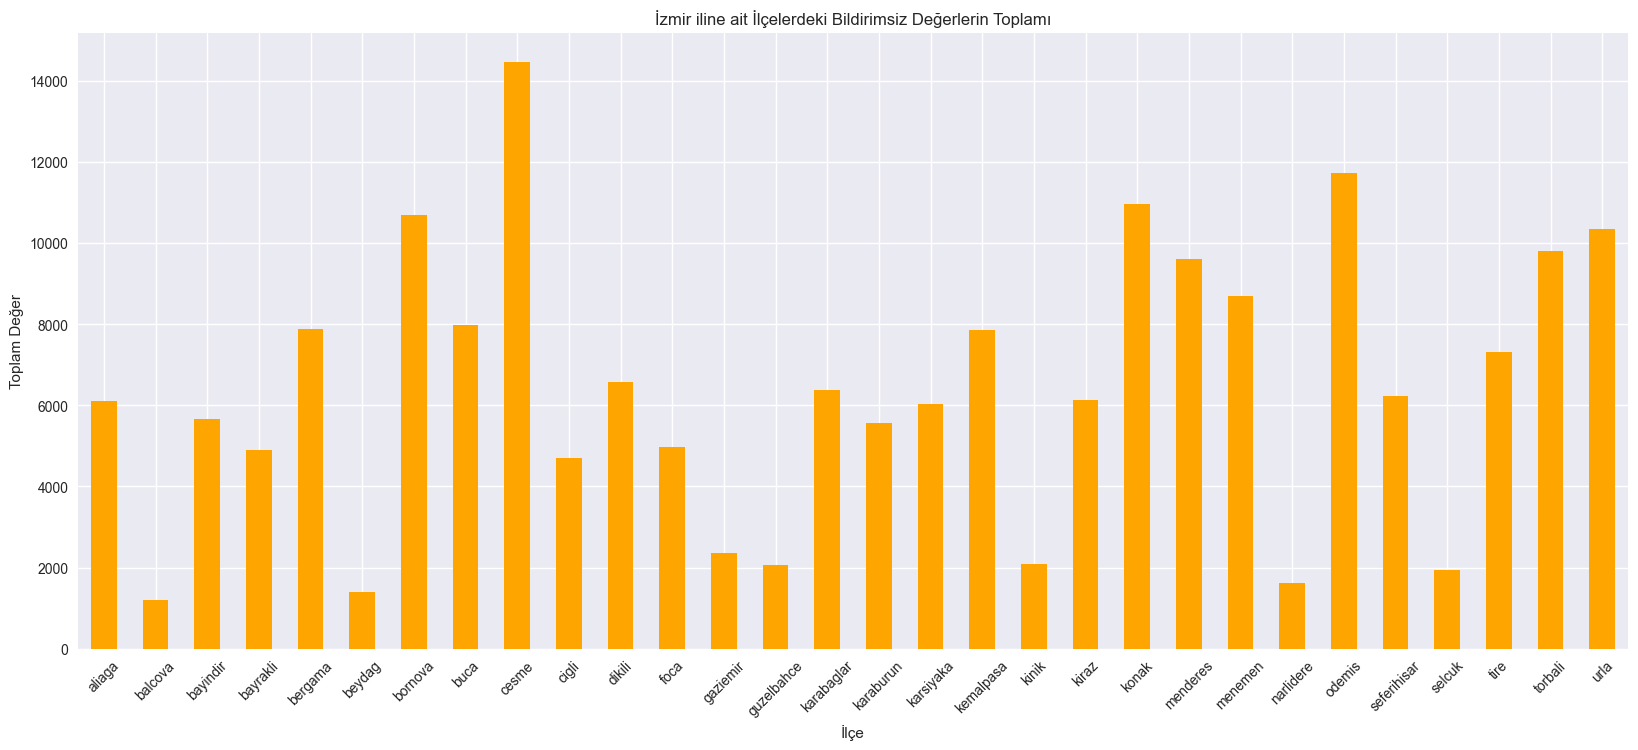

In [14]:
# izmir bildirimsiz sum toplamı
df_filtered = df[df['il'] == 'izmir']
df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce') 

df_grouped = df_filtered.groupby('ilcee')['bildirimsiz_sum'].sum()

plt.style.use('seaborn')
plt.figure(figsize=(20, 8))
df_grouped.plot(kind='bar', color='orange')
plt.title('İzmir iline ait İlçelerdeki Bildirimsiz Değerlerin Toplamı')
plt.xlabel('İlçe')
plt.ylabel('Toplam Değer')
plt.xticks(rotation=45)
plt.show()

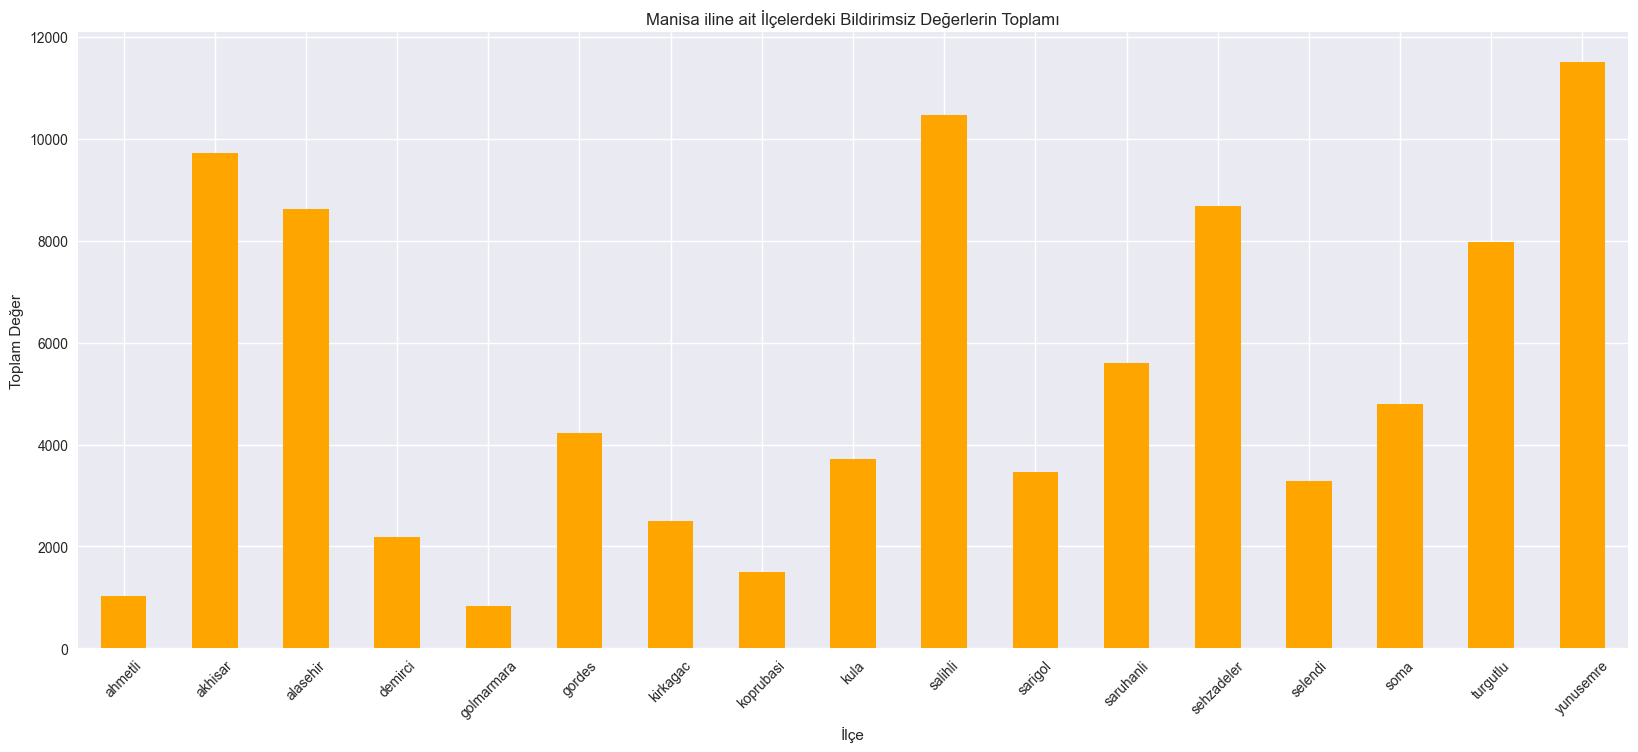

In [15]:
# manisa bildirimsiz sum toplamı
df_filtered = df[df['il'] == 'manisa']
df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce')

df_grouped = df_filtered.groupby('ilcee')['bildirimsiz_sum'].sum()

plt.style.use('seaborn')
plt.figure(figsize=(20, 8))
df_grouped.plot(kind='bar', color='orange')
plt.title('Manisa iline ait İlçelerdeki Bildirimsiz Değerlerin Toplamı')
plt.xlabel('İlçe')
plt.ylabel('Toplam Değer')
plt.xticks(rotation=45)
plt.show()

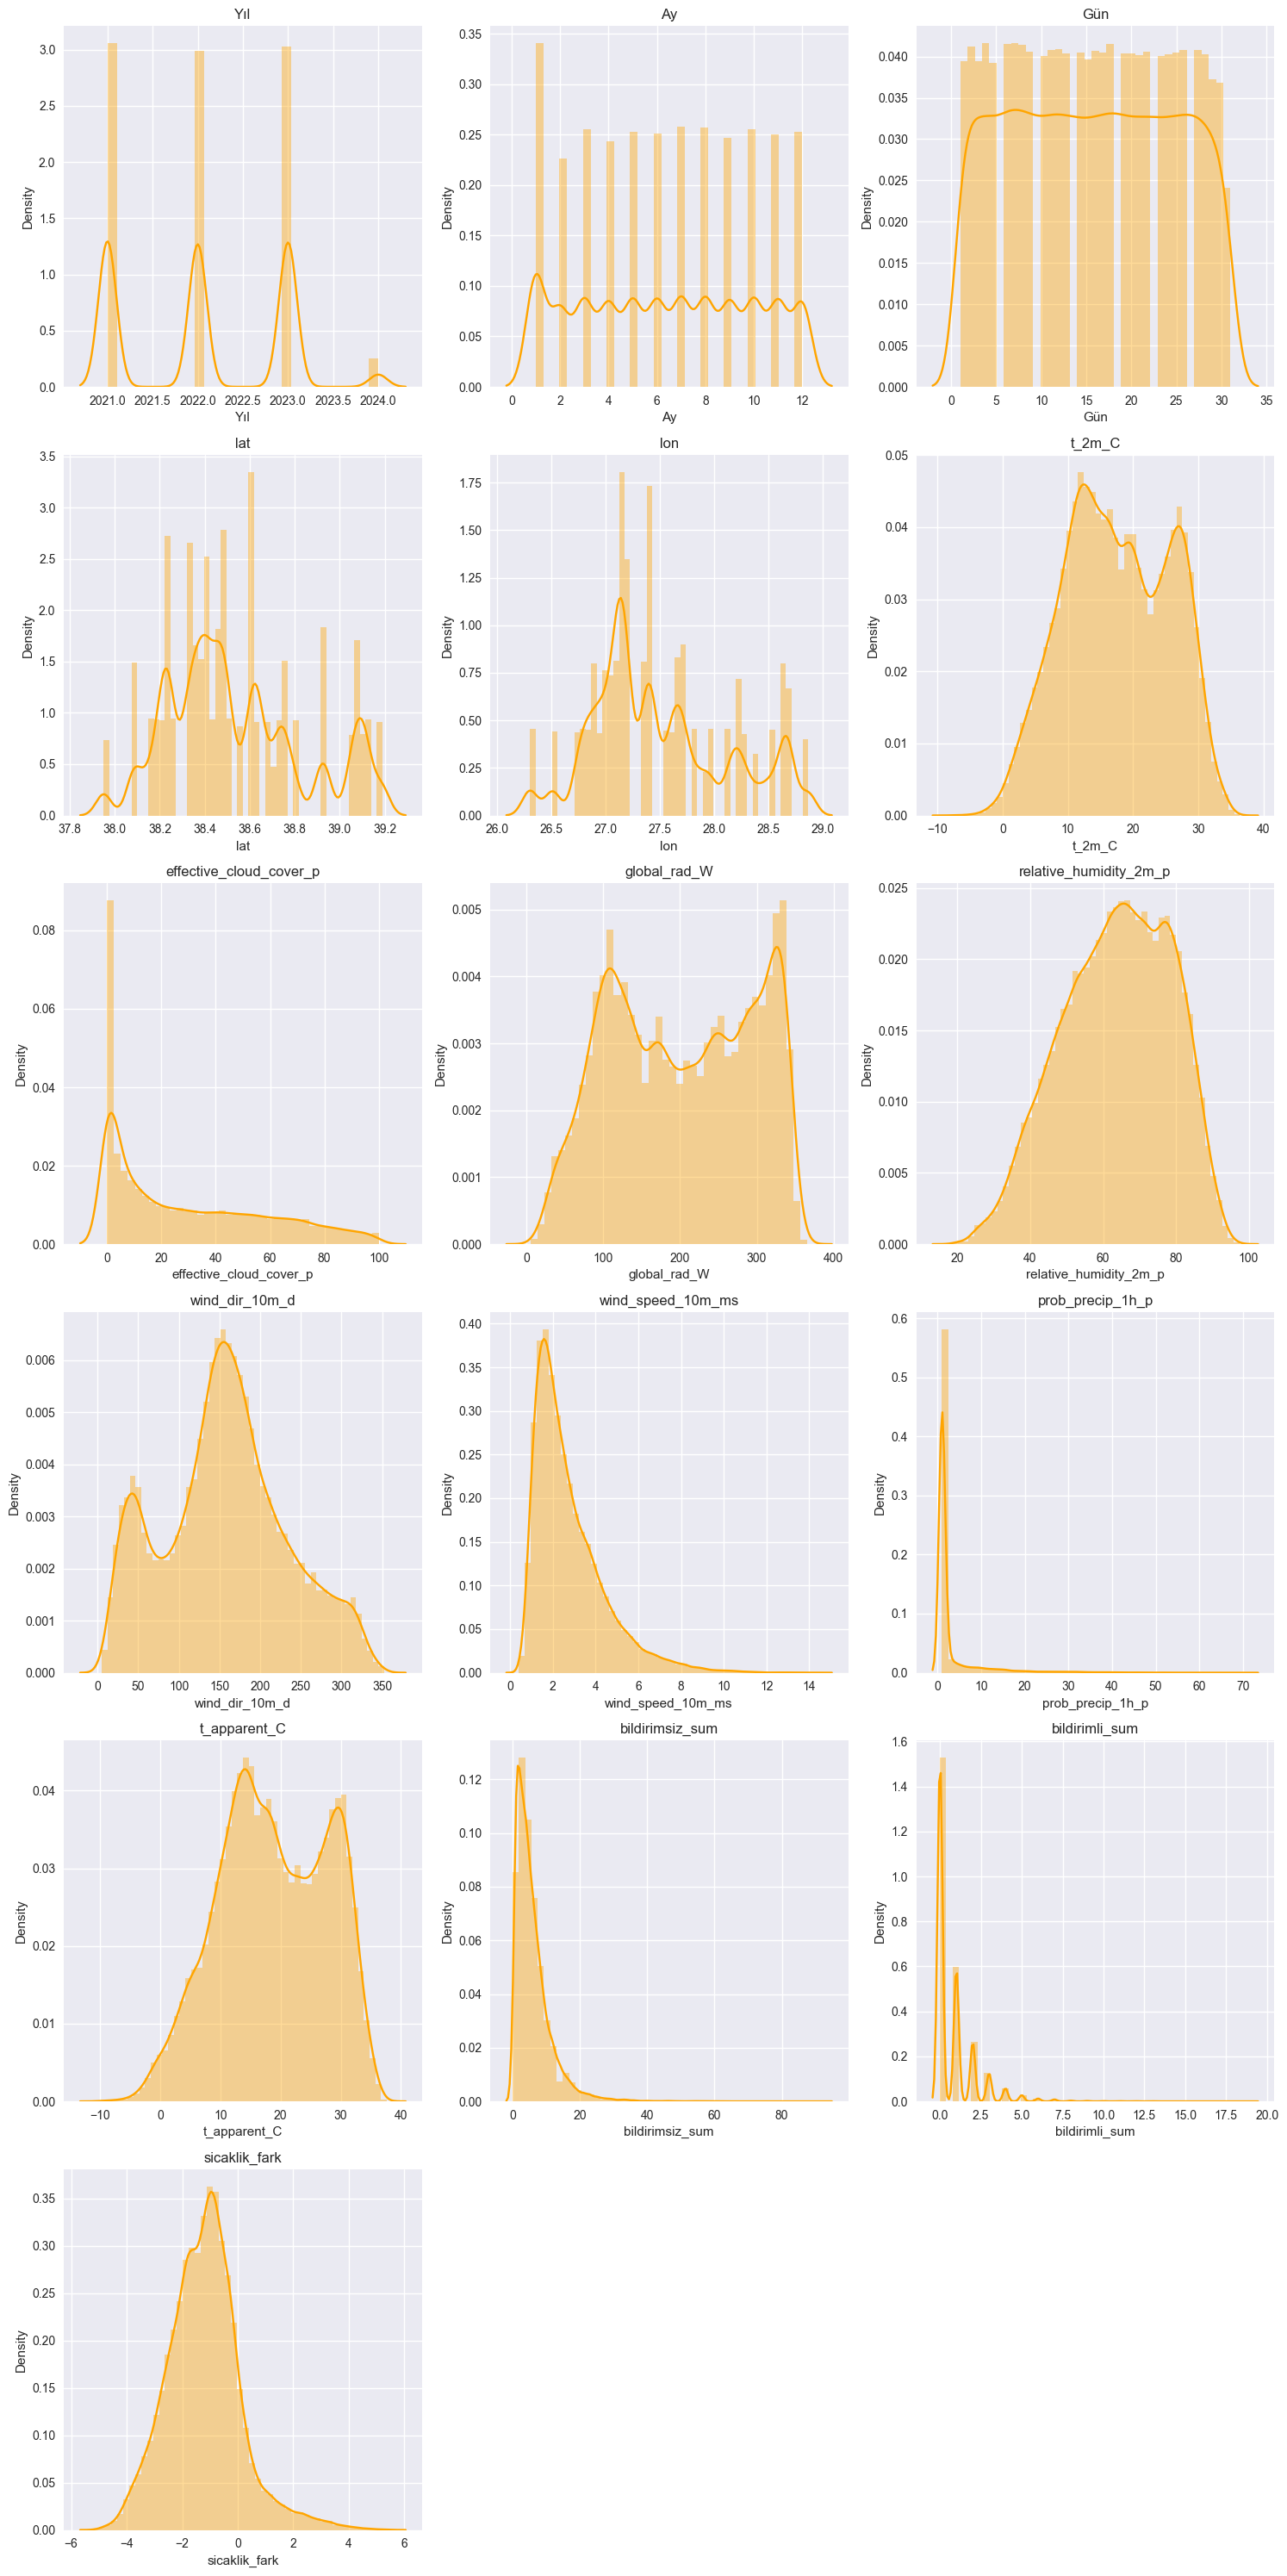

In [16]:

numeric_columns = df.select_dtypes(include=['float', 'int']).columns

n_rows = (len(numeric_columns) - 1) // 3 + 1
n_cols = min(len(numeric_columns), 3)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, column in enumerate(numeric_columns):
    row = i // n_cols
    col = i % n_cols
    sns.distplot(df[column], ax=axes[row, col], color='orange')
    axes[row, col].set_title(column, size=12)
    axes[row, col].grid(True)

for i in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


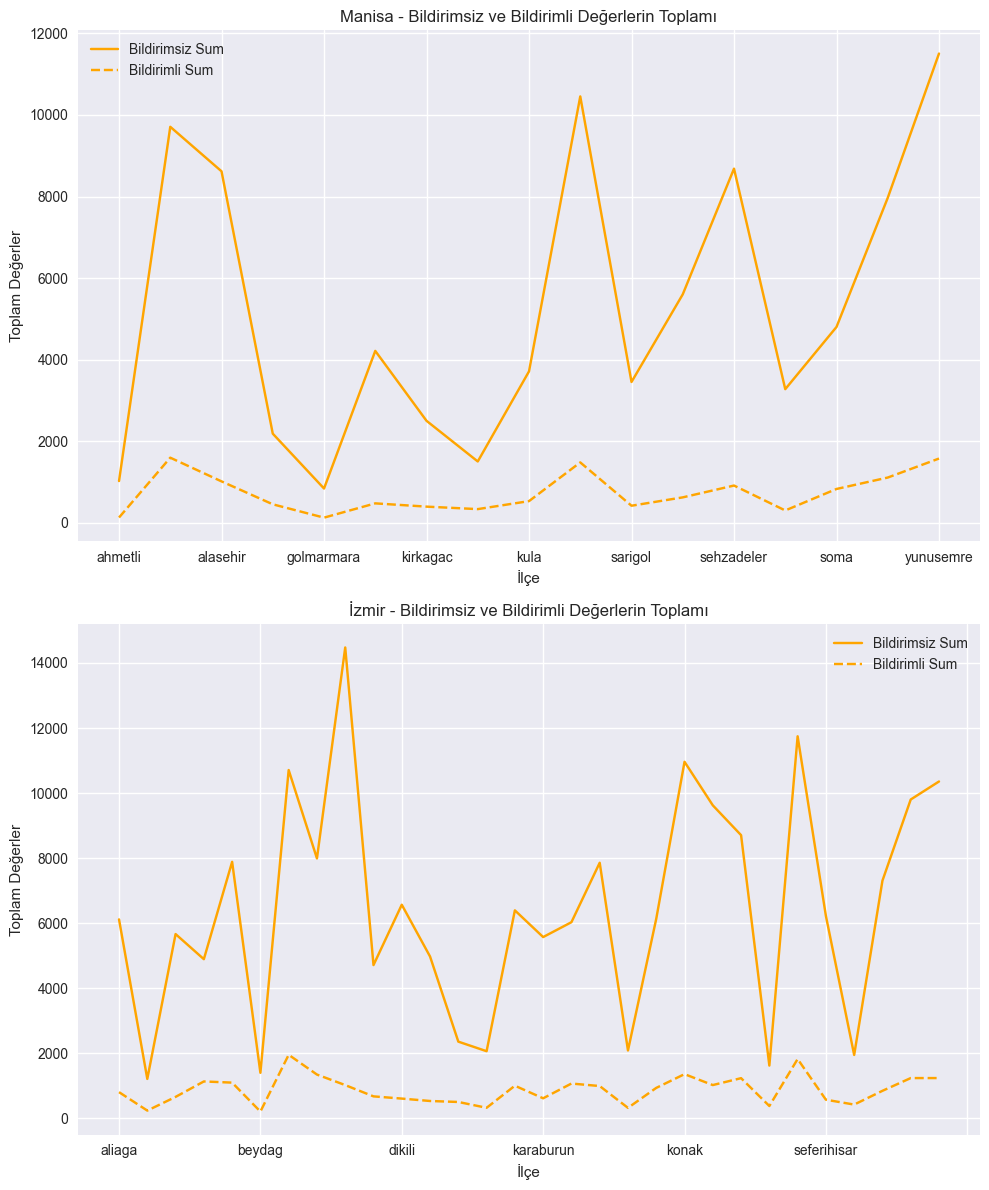

In [17]:
# Manisa verilerini filtrele
df_filtered_manisa = df[df['il'] == 'manisa']
df_filtered_manisa['bildirimsiz_sum'] = pd.to_numeric(df_filtered_manisa['bildirimsiz_sum'], errors='coerce')
df_filtered_manisa['bildirimli_sum'] = pd.to_numeric(df_filtered_manisa['bildirimli_sum'], errors='coerce')
bildirimsiz_sum_manisa = df_filtered_manisa.groupby('ilcee')['bildirimsiz_sum'].sum()
bildirimli_sum_manisa = df_filtered_manisa.groupby('ilcee')['bildirimli_sum'].sum()
summary_df_manisa = pd.DataFrame({
    'Bildirimsiz Sum': bildirimsiz_sum_manisa,
    'Bildirimli Sum': bildirimli_sum_manisa
})

# İzmir verilerini filtrele
df_filtered_izmir = df[df['il'] == 'izmir']
df_filtered_izmir['bildirimsiz_sum'] = pd.to_numeric(df_filtered_izmir['bildirimsiz_sum'], errors='coerce')
df_filtered_izmir['bildirimli_sum'] = pd.to_numeric(df_filtered_izmir['bildirimli_sum'], errors='coerce')
bildirimsiz_sum_izmir = df_filtered_izmir.groupby('ilcee')['bildirimsiz_sum'].sum()
bildirimli_sum_izmir = df_filtered_izmir.groupby('ilcee')['bildirimli_sum'].sum()
summary_df_izmir = pd.DataFrame({
    'Bildirimsiz Sum': bildirimsiz_sum_izmir,
    'Bildirimli Sum': bildirimli_sum_izmir
})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

summary_df_manisa.plot(ax=ax1, color=['orange', 'orange'], style=['-', '--'])
ax1.set_title('Manisa - Bildirimsiz ve Bildirimli Değerlerin Toplamı')
ax1.set_xlabel('İlçe')
ax1.set_ylabel('Toplam Değerler')
ax1.grid(True)

summary_df_izmir.plot(ax=ax2, color=['orange', 'orange'], style=['-', '--'])
ax2.set_title('İzmir - Bildirimsiz ve Bildirimli Değerlerin Toplamı')
ax2.set_xlabel('İlçe')
ax2.set_ylabel('Toplam Değerler')
ax2.grid(True)

plt.tight_layout()
plt.show()


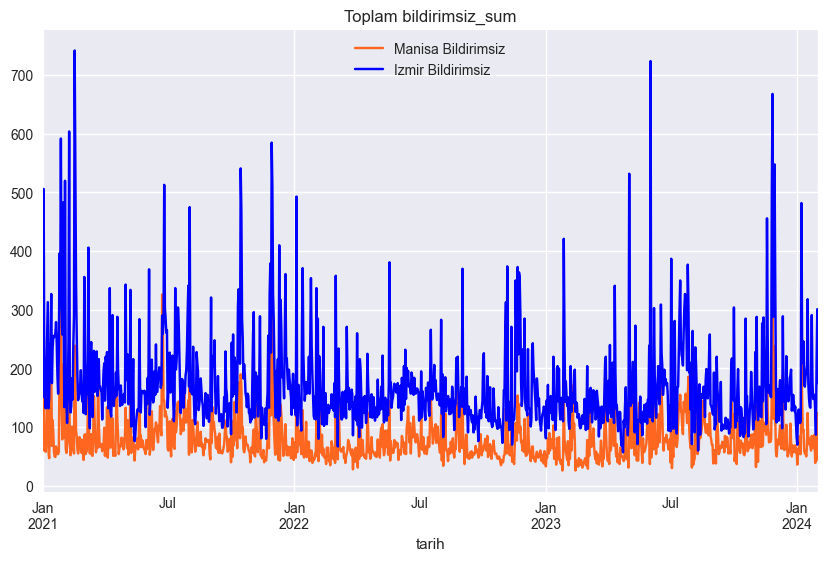

In [18]:
df_filtered_manisa = df[df['il'] == 'manisa']
df_filtered_manisa['bildirimsiz_sum'] = pd.to_numeric(df_filtered_manisa['bildirimsiz_sum'], errors='coerce')
bildirimsiz_sum_manisa = df_filtered_manisa.groupby('tarih')['bildirimsiz_sum'].sum()

df_filtered_izmir = df[df['il'] == 'izmir']
df_filtered_izmir['bildirimsiz_sum'] = pd.to_numeric(df_filtered_izmir['bildirimsiz_sum'], errors='coerce')
bildirimsiz_sum_izmir = df_filtered_izmir.groupby('tarih')['bildirimsiz_sum'].sum()


plt.figure(figsize=(10, 6))

bildirimsiz_sum_manisa.plot(label='Manisa Bildirimsiz', color='#ff661f', linestyle='-')

bildirimsiz_sum_izmir.plot(label='Izmir Bildirimsiz', color='blue', linestyle='-')

plt.title('Toplam bildirimsiz_sum')
plt.legend()
plt.grid(True)

#plt.xticks(rotation=45)
plt.savefig('manisa_izmir_bildirimsiz_sum.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

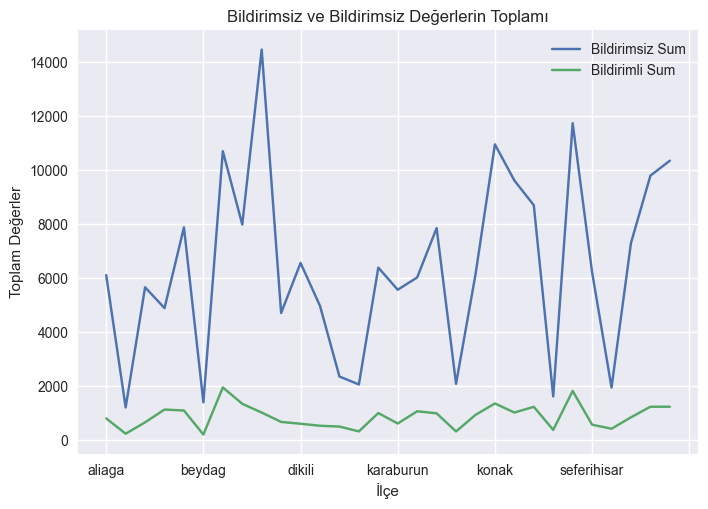

In [19]:
df_filtered = df[df['il'] == 'izmir']

df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce')
df_filtered['bildirimli_sum'] = pd.to_numeric(df_filtered['bildirimli_sum'], errors='coerce')

bildirimsiz_sum = df_filtered.groupby('ilcee')['bildirimsiz_sum'].sum()
bildirimli_sum = df_filtered.groupby('ilcee')['bildirimli_sum'].sum()

summary_df = pd.DataFrame({
    'Bildirimsiz Sum': bildirimsiz_sum,
    'Bildirimli Sum': bildirimli_sum
})

plt.figure(figsize=(10, 6))
summary_df.plot()
plt.title('Bildirimsiz ve Bildirimsiz Değerlerin Toplamı')
plt.xlabel('İlçe')
plt.ylabel('Toplam Değerler')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

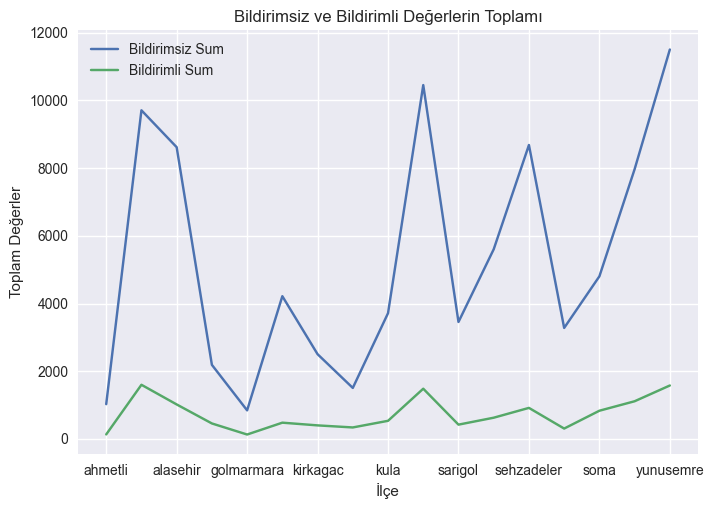

In [20]:
df_filtered = df[df['il'] == 'manisa']

df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce')
df_filtered['bildirimli_sum'] = pd.to_numeric(df_filtered['bildirimli_sum'], errors='coerce')

bildirimsiz_sum = df_filtered.groupby('ilcee')['bildirimsiz_sum'].sum()
bildirimli_sum = df_filtered.groupby('ilcee')['bildirimli_sum'].sum()

summary_df = pd.DataFrame({
    'Bildirimsiz Sum': bildirimsiz_sum,
    'Bildirimli Sum': bildirimli_sum
})

plt.figure(figsize=(10, 6))
summary_df.plot()
plt.title('Bildirimsiz ve Bildirimli Değerlerin Toplamı')
plt.xlabel('İlçe')
plt.ylabel('Toplam Değerler')
plt.grid(True)
plt.show()

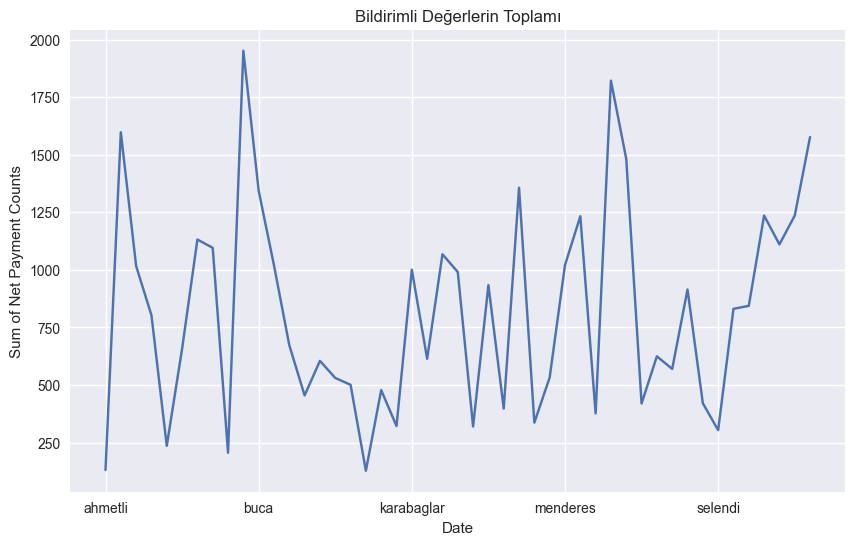

In [21]:
# manisa bildirimsiz sum toplamı
df_filtered = df[df['il'] == 'manisa']
df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce')

df_filtered = df.groupby('ilcee')['bildirimli_sum'].sum()
plt.figure(figsize=(10, 6))
df_filtered.plot()
plt.title('Bildirimli Değerlerin Toplamı')
plt.xlabel('Date')
plt.ylabel('Sum of Net Payment Counts')
plt.grid(True)
plt.show()

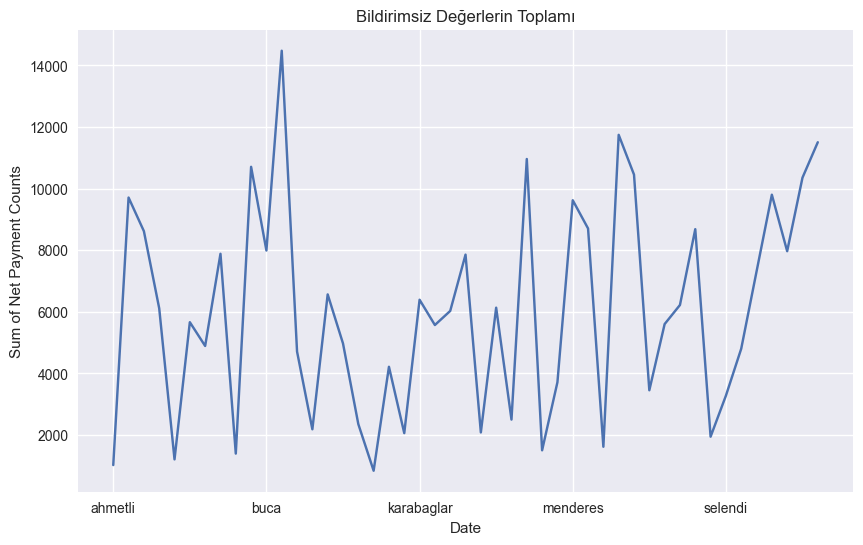

In [22]:
# manisa bildirimsiz sum toplamı
df_filtered = df[df['il'] == 'manisa']
df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce')

df_filtered = df.groupby('ilcee')['bildirimsiz_sum'].sum()
plt.figure(figsize=(10, 6))
df_filtered.plot()
plt.title('Bildirimsiz Değerlerin Toplamı')
plt.xlabel('Date')
plt.ylabel('Sum of Net Payment Counts')
plt.grid(True)
plt.show()

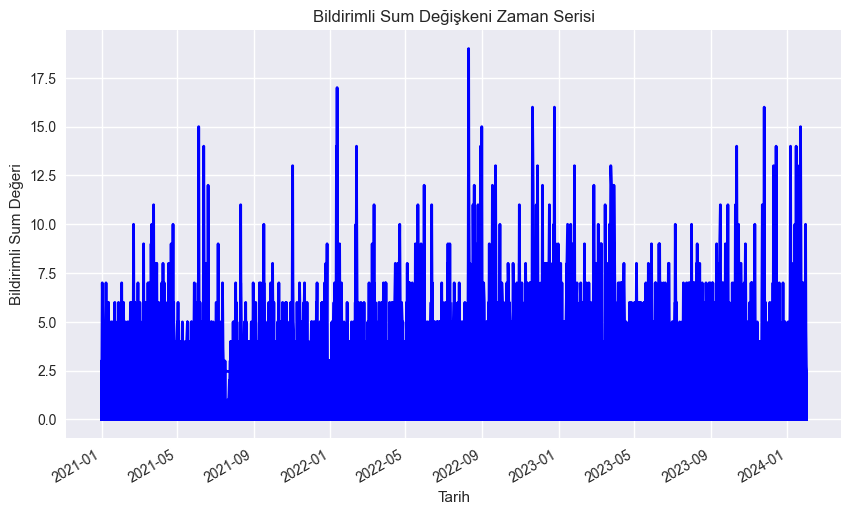

In [23]:
df['tarih'] = pd.to_datetime(df['tarih']) 
df.set_index('tarih', inplace=True)  

plt.figure(figsize=(10, 6))
df['bildirimli_sum'].plot(color='blue', linewidth=2)
plt.title('Bildirimli Sum Değişkeni Zaman Serisi')
plt.xlabel('Tarih')
plt.ylabel('Bildirimli Sum Değeri')
plt.grid(True)
plt.show()


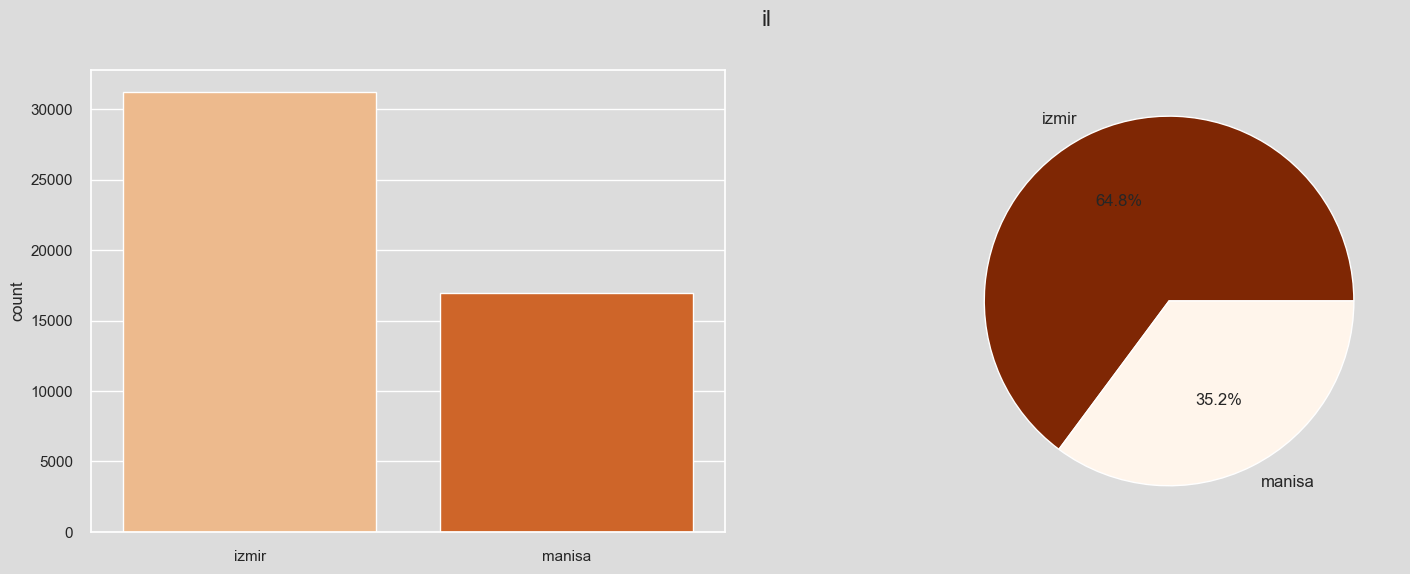

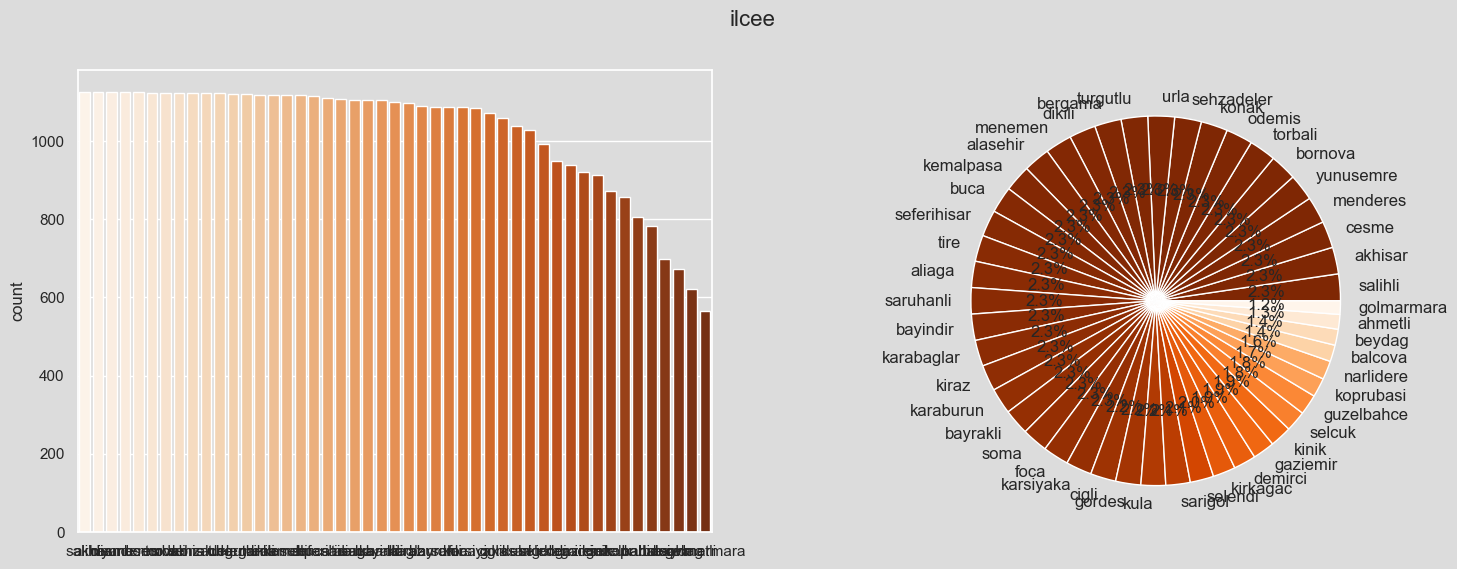

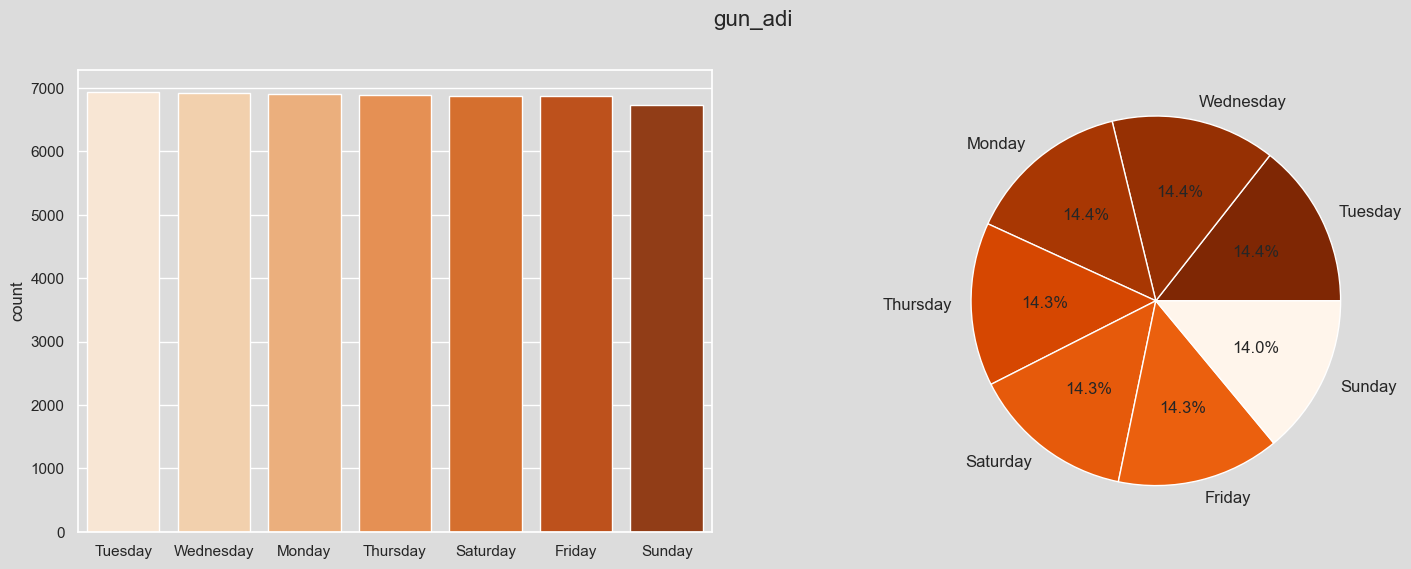

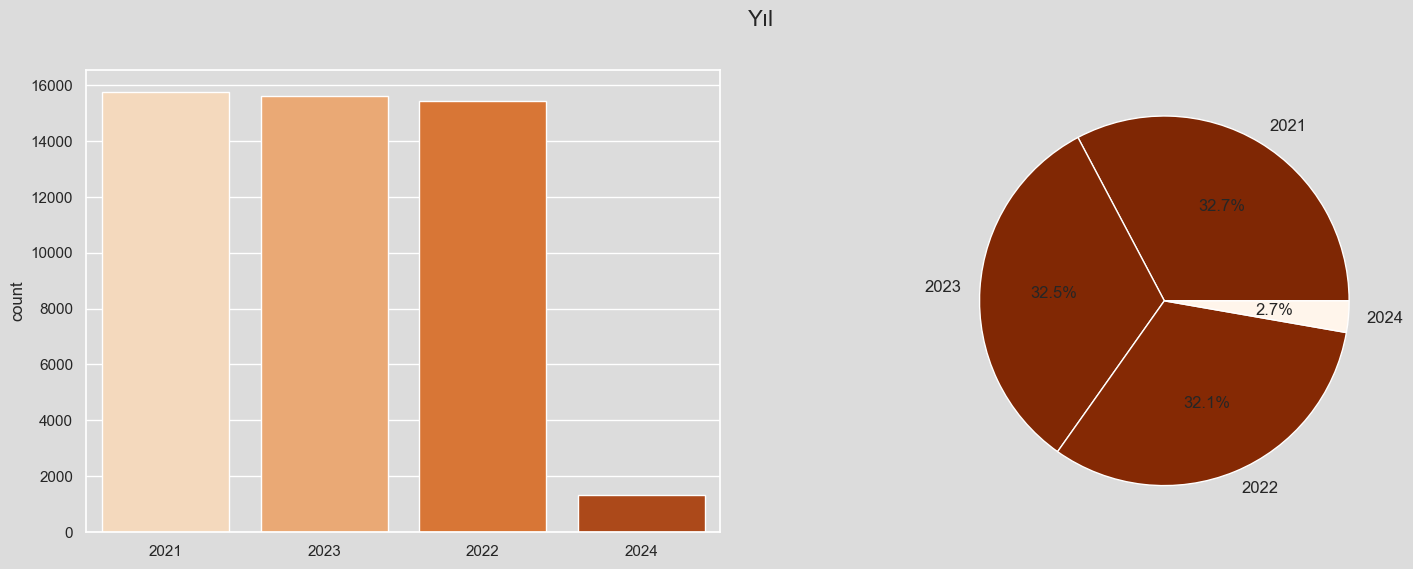

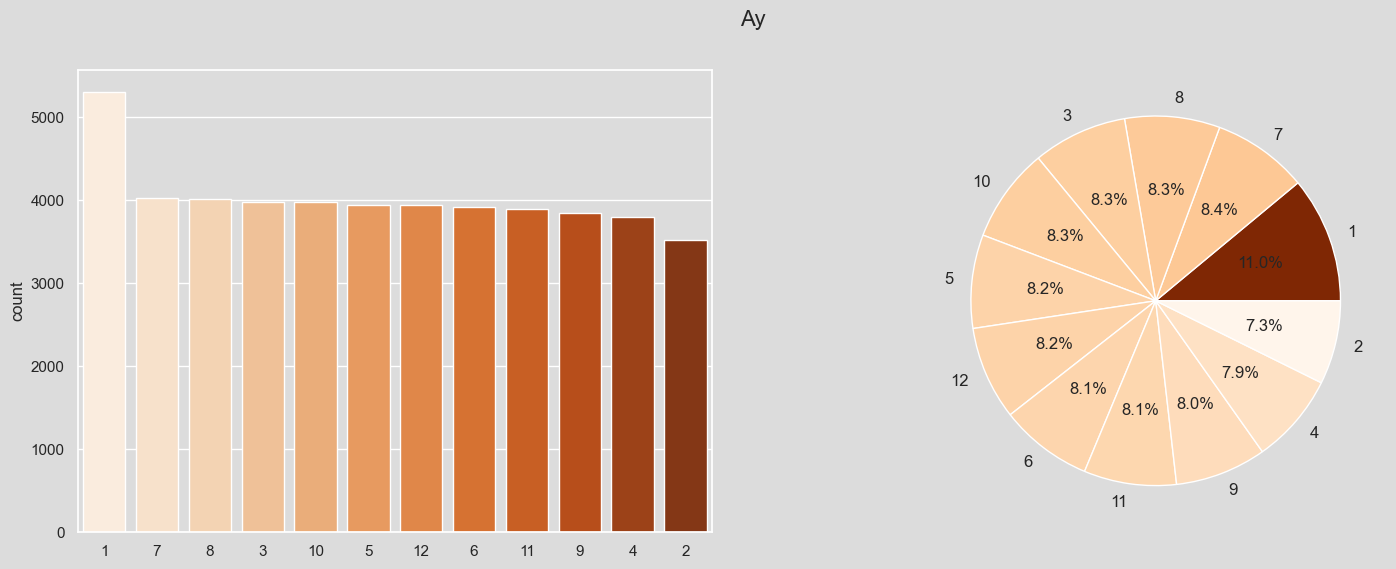

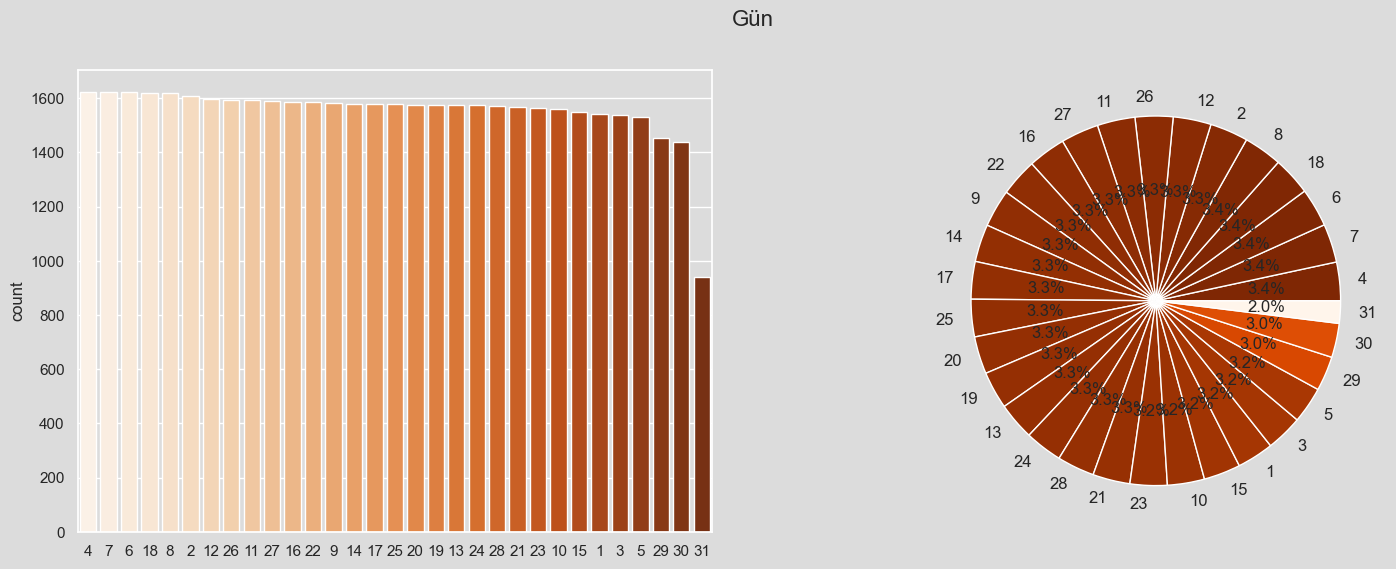

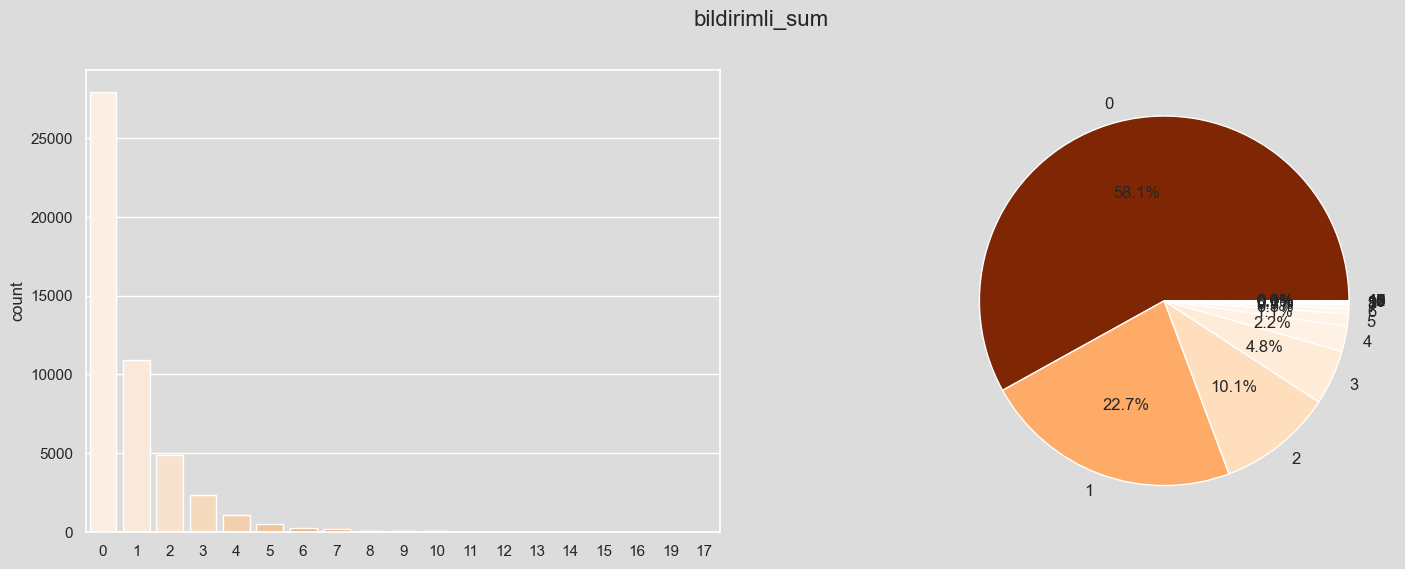

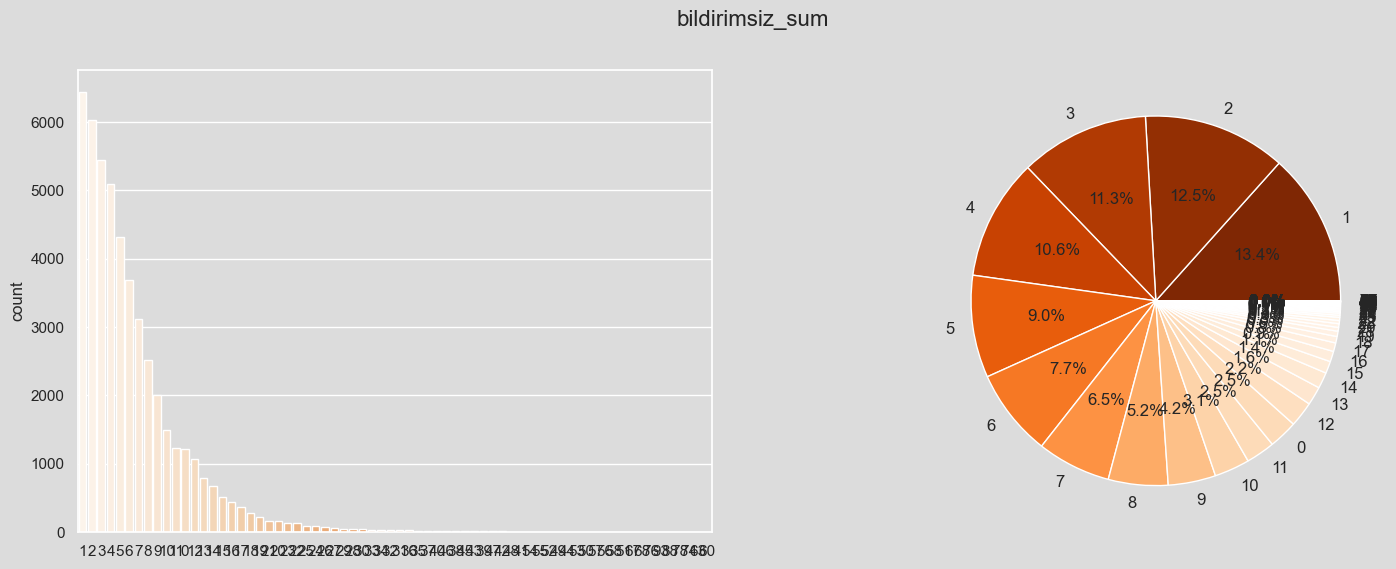

In [24]:
def cat_analyser(data, col, freq_limit = 100):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= palette1,
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap(cmap1)
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()

cat_cols = ['il',
            'ilcee',
            'gun_adi',
            'Yıl',
            'Ay',
            'Gün',
            #'SÜREYE_GÖRE',
            'bildirimli_sum',
            'bildirimsiz_sum']
for col in cat_cols:
    cat_analyser(df, col)